## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice

## Reading the csv files


In [2]:

Malkia=pd.read_csv("./data/Malkia_Nakuru_20_February_2024_to_20_March_2024.csv")
Malkia


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,10.0,µg/m³,2024-02-20T01:00:00+00:00,2024-02-20T04:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
1,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,22.0,µg/m³,2024-02-20T02:00:00+00:00,2024-02-20T05:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
2,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,21.0,µg/m³,2024-02-20T03:00:00+00:00,2024-02-20T06:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
3,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,29.0,µg/m³,2024-02-20T04:00:00+00:00,2024-02-20T07:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
4,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,31.0,µg/m³,2024-02-20T05:00:00+00:00,2024-02-20T08:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,25.0,f,2024-03-19T18:00:00+00:00,2024-03-19T21:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
2862,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,23.0,f,2024-03-19T20:00:00+00:00,2024-03-19T23:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
2863,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,22.0,f,2024-03-19T21:00:00+00:00,2024-03-20T00:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity
2864,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,21.0,f,2024-03-19T22:00:00+00:00,2024-03-20T01:00:00+03:00,Africa/Nairobi,-0.267398,36.021802,NaN,NaN,NaN,Clarity,clarity


In [3]:
Malkia.drop(['latitude', 'longitude', 'country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider', 'datetimeLocal'], axis=1, inplace=True)


## Basic data inspection and cleaning: Handling missing values, duplicate entries, and data types.

In the cells below, i have condensed every thing and should you want to see what each line does simply remove the '#'

'describe' will provide the following statistics for each column

'info ' gives a concise summary of the dataframe

'is null.values.any' checks for any null values and returns true if any exists

'duplicated.any' checks for any duplicated entries and returns true if any exists

'dropna' drops any missing values

In [4]:
Malkia.describe(include='all')
Malkia.info()
Malkia.isnull().values.any()
Malkia.duplicated().any()
Malkia.dropna(axis=1, inplace=True)
Malkia.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    2866 non-null   int64  
 1   location_name  2866 non-null   object 
 2   parameter      2866 non-null   object 
 3   value          2866 non-null   float64
 4   unit           2866 non-null   object 
 5   datetimeUtc    2866 non-null   object 
 6   timezone       2866 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 156.9+ KB


False

check the shape of all dataframes as we will need to merge them 

In [5]:
Malkia.shape

(2866, 7)

In [6]:
Malkia

,location_id,location_name,parameter,value,unit,datetimeUtc,timezone
0,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,10.0,µg/m³,2024-02-20T01:00:00+00:00,Africa/Nairobi
1,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,22.0,µg/m³,2024-02-20T02:00:00+00:00,Africa/Nairobi
2,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,21.0,µg/m³,2024-02-20T03:00:00+00:00,Africa/Nairobi
3,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,29.0,µg/m³,2024-02-20T04:00:00+00:00,Africa/Nairobi
4,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,31.0,µg/m³,2024-02-20T05:00:00+00:00,Africa/Nairobi
...,...,...,...,...,...,...,...
2861,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,25.0,f,2024-03-19T18:00:00+00:00,Africa/Nairobi
2862,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,23.0,f,2024-03-19T20:00:00+00:00,Africa/Nairobi
2863,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,22.0,f,2024-03-19T21:00:00+00:00,Africa/Nairobi
2864,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,21.0,f,2024-03-19T22:00:00+00:00,Africa/Nairobi


Subseting the date column and all values with pm25 as the parameter

In [7]:


Malkia['datetimeUtc']=pd.to_datetime(Malkia['datetimeUtc'])

In [8]:
Malkia

,location_id,location_name,parameter,value,unit,datetimeUtc,timezone
0,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,10.0,µg/m³,2024-02-20 01:00:00+00:00,Africa/Nairobi
1,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,22.0,µg/m³,2024-02-20 02:00:00+00:00,Africa/Nairobi
2,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,21.0,µg/m³,2024-02-20 03:00:00+00:00,Africa/Nairobi
3,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,29.0,µg/m³,2024-02-20 04:00:00+00:00,Africa/Nairobi
4,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,31.0,µg/m³,2024-02-20 05:00:00+00:00,Africa/Nairobi
...,...,...,...,...,...,...,...
2861,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,25.0,f,2024-03-19 18:00:00+00:00,Africa/Nairobi
2862,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,23.0,f,2024-03-19 20:00:00+00:00,Africa/Nairobi
2863,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,22.0,f,2024-03-19 21:00:00+00:00,Africa/Nairobi
2864,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,21.0,f,2024-03-19 22:00:00+00:00,Africa/Nairobi


I want to plot a linegraph of pm25 over time.I want to take the average of readings per day and plot for the month

In [9]:
import pandas as pd


Malkia['datetimeUtc'] = pd.to_datetime(Malkia['datetimeUtc'])
Malkia['date'] = Malkia['datetimeUtc'].dt.to_period('D')

# To suppress the warning:
import warnings
warnings.filterwarnings('ignore', 'Converting to PeriodArray/Index representation will drop timezone information.')


C:\Users\user\AppData\Local\Temp\ipykernel_19388\1166660874.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  Malkia['date'] = Malkia['datetimeUtc'].dt.to_period('D')


In [10]:
Malkia.drop(['datetimeUtc'] ,axis=1,inplace=True)



In [11]:
Malkia

,location_id,location_name,parameter,value,unit,timezone,date
0,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,10.0,µg/m³,Africa/Nairobi,2024-02-20
1,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,22.0,µg/m³,Africa/Nairobi,2024-02-20
2,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,21.0,µg/m³,Africa/Nairobi,2024-02-20
3,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,29.0,µg/m³,Africa/Nairobi,2024-02-20
4,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",pm25,31.0,µg/m³,Africa/Nairobi,2024-02-20
...,...,...,...,...,...,...,...
2861,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,25.0,f,Africa/Nairobi,2024-03-19
2862,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,23.0,f,Africa/Nairobi,2024-03-19
2863,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,22.0,f,Africa/Nairobi,2024-03-19
2864,1894637,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",temperature,21.0,f,Africa/Nairobi,2024-03-19


In [12]:
Malkia.drop(['location_name'] ,axis=1,inplace=True)

In [13]:
Malkia.drop(['timezone'] ,axis=1,inplace=True)

In [14]:
Malkia

,location_id,parameter,value,unit,date
0,1894637,pm25,10.0,µg/m³,2024-02-20
1,1894637,pm25,22.0,µg/m³,2024-02-20
2,1894637,pm25,21.0,µg/m³,2024-02-20
3,1894637,pm25,29.0,µg/m³,2024-02-20
4,1894637,pm25,31.0,µg/m³,2024-02-20
...,...,...,...,...,...
2861,1894637,temperature,25.0,f,2024-03-19
2862,1894637,temperature,23.0,f,2024-03-19
2863,1894637,temperature,22.0,f,2024-03-19
2864,1894637,temperature,21.0,f,2024-03-19


In [15]:

df_pm25 = Malkia[Malkia['parameter'] == 'pm25'].copy()  # Filter the data for 'pm25' measurements and create a copy

# Calculate the daily average of 'pm25' values
df_pm25.loc[:, 'daily_avg_pm25'] = df_pm25.groupby('date')['value'].transform('mean')
df_pm25
#calculate the daily average of 'pm10'
df_pm10 = Malkia[Malkia['parameter'] == 'pm10'].copy()
df_pm10.loc[:, 'daily_avg_pm10'] = df_pm10.groupby('date')['value'].transform('mean')
#df_pm10
#calculate the daily average of 'temp'
temp= Malkia[Malkia['parameter'] == 'temperature'].copy()
temp.loc[:, 'avg_temp'] = Malkia.groupby('date')['value'].transform('mean')
#temp

#calculate the daily average of 'pm1'
pm1= Malkia[Malkia['parameter'] == 'pm1'].copy()
pm1.loc[:, 'avg_pm1'] = Malkia.groupby('date')['value'].transform('mean')
#pm1




In [21]:
df_pm25

,location_id,parameter,value,unit,date,daily_avg_pm25
0,1894637,pm25,10.0,µg/m³,2024-02-20,17.165217
1,1894637,pm25,22.0,µg/m³,2024-02-20,17.165217
2,1894637,pm25,21.0,µg/m³,2024-02-20,17.165217
3,1894637,pm25,29.0,µg/m³,2024-02-20,17.165217
4,1894637,pm25,31.0,µg/m³,2024-02-20,17.165217
...,...,...,...,...,...,...
690,1894637,pm25,17.0,µg/m³,2024-03-19,10.779167
691,1894637,pm25,11.0,µg/m³,2024-03-19,10.779167
692,1894637,pm25,8.3,µg/m³,2024-03-19,10.779167
693,1894637,pm25,7.8,µg/m³,2024-03-19,10.779167


In [17]:


df_pm25.to_csv('pm25.csv', index=False)
df_pm10.to_csv('pm10.csv', index=False)
temp.to_csv('temp.csv', index=False)
pm1.to_csv('pm1.csv', index=False)

What is the acceptable level of PM2 5?
5 over a 24-hour period. Most studies indicate PM2. 5 at or below 12 μg/m3 is considered healthy with little to no risk from exposure

In [18]:
Malkia['date']=Malkia['date'].dt.to_timestamp()



C:\Users\user\AppData\Local\Temp\ipykernel_2276\3093475028.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax25.plot_date(df_pm25['date'], df_pm25['daily_avg_pm25'], marker='o', linestyle='-')
C:\Users\user\AppData\Local\Temp\ipykernel_2276\3093475028.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax10.plot_date(df_pm10['date'], df_pm10['daily_avg_pm10'], marker='o', linestyle='-',color='black')
C:\Users\user\AppData\Local\Temp\ipykernel_2276\3093475028.py:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(pm1['date'], pm1['avg_pm1'], marker='o', linestyle='-',color='red')
C:\Users\user\AppData\Local\Temp\ipykernel_2276\309

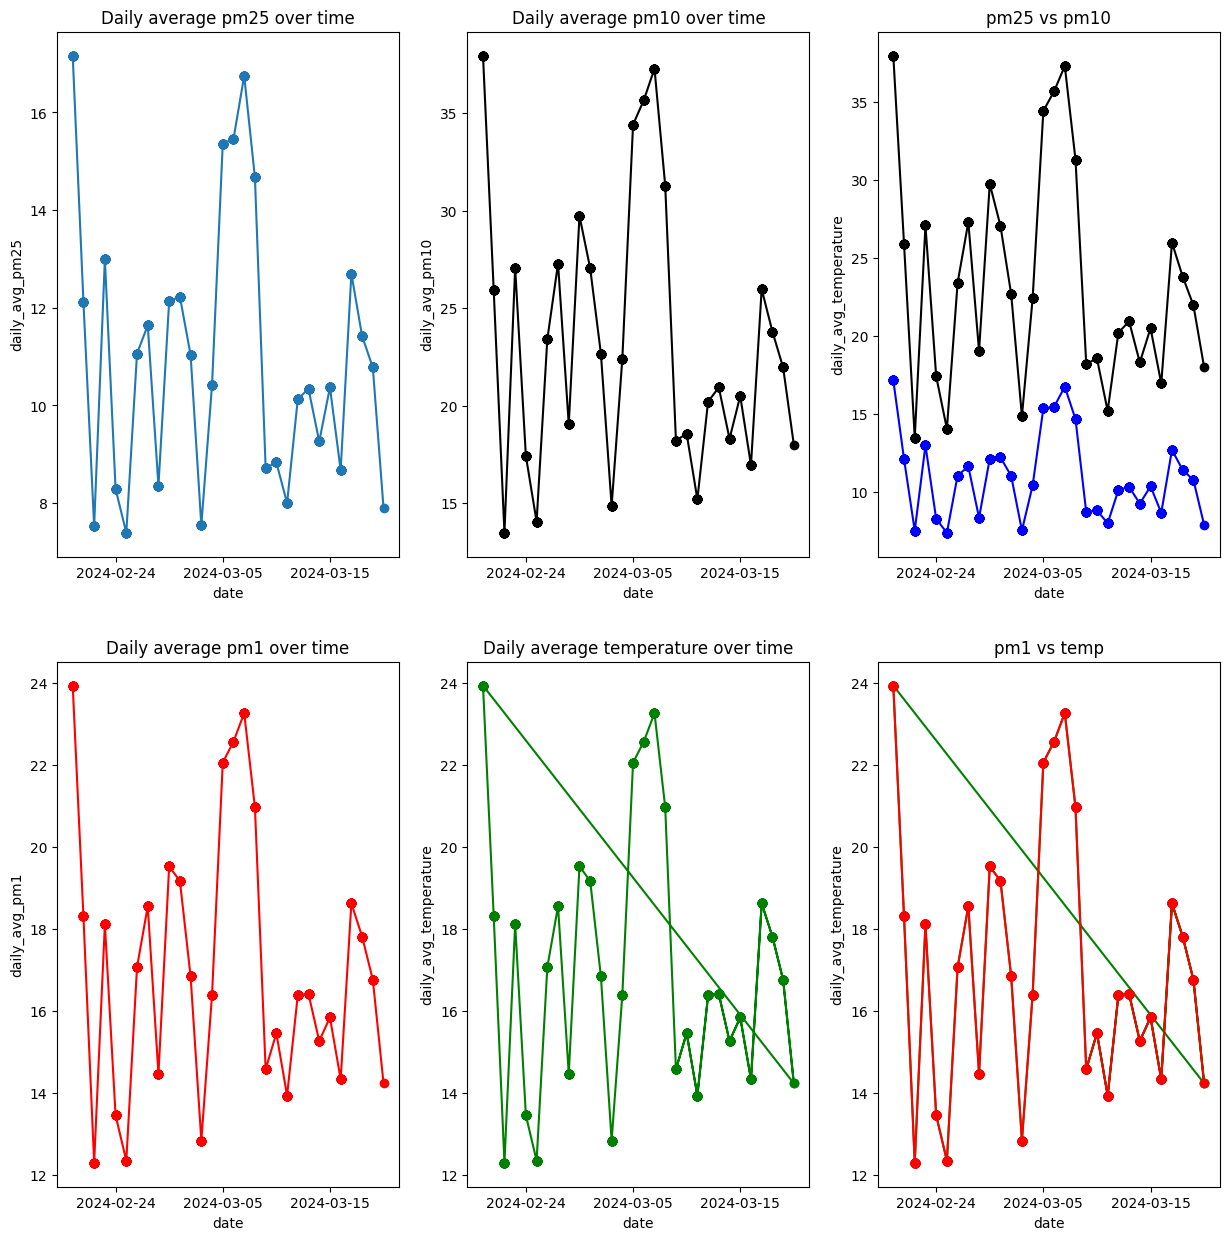

In [23]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
x = np.linspace(0, 2 * np.pi, 400)

fig, axs = plt.subplots(2, 3, figsize=(15, 15)) # Create a 3x3 grid of subplots

ax25 = axs[0, 0]  # Assign the first subplot to a variable
ax10=axs[0,1]
ax1=axs[1,0]
tmp=axs[1,1]
pm25vspm10=axs[0,2]
pm1vstemp=axs[1,2]




# Plot your graph  pm25
ax25.plot_date(df_pm25['date'], df_pm25['daily_avg_pm25'], marker='o', linestyle='-')
ax25.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax25.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # adjust the interval for your needs
ax25.set_xlabel('date')
ax25.set_ylabel('daily_avg_pm25')
ax25.set_title('Daily average pm25 over time')

#plot 2nd graph for pm10
ax10.plot_date(df_pm10['date'], df_pm10['daily_avg_pm10'], marker='o', linestyle='-',color='black')
ax10.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax10.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # adjust the interval for your needs
ax10.set_xlabel('date')
ax10.set_ylabel('daily_avg_pm10')
ax10.set_title('Daily average pm10 over time')

#plot 3rd graph pm1
ax1.plot_date(pm1['date'], pm1['avg_pm1'], marker='o', linestyle='-',color='red')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # adjust the interval for your needs
ax1.set_xlabel('date')
ax1.set_ylabel('daily_avg_pm1')
ax1.set_title('Daily average pm1 over time')



#plot 4th graph temp
tmp.plot_date(temp['date'], temp['avg_temp'], marker='o', linestyle='-',color='green')
tmp.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
tmp.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # adjust the interval for your needs
tmp.set_xlabel('date')
tmp.set_ylabel('daily_avg_temperature')
tmp.set_title('Daily average temperature over time')

#plot combined graph
pm25vspm10.plot_date(df_pm25['date'], df_pm25['daily_avg_pm25'], marker='o', linestyle='-',color='blue')
pm25vspm10.plot_date(df_pm10['date'], df_pm10['daily_avg_pm10'], marker='o', linestyle='-',color='black')

pm25vspm10.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pm25vspm10.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # adjust the interval for your needs
pm25vspm10.set_xlabel('date')
pm25vspm10.set_ylabel('daily_avg_temperature')
pm25vspm10.set_title('pm25 vs pm10')



pm1vstemp.plot_date(temp['date'], temp['avg_temp'], marker='o', linestyle='-',color='green')
pm1vstemp.plot_date(pm1['date'], pm1['avg_pm1'], marker='o', linestyle='-',color='red')
pm1vstemp.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
pm1vstemp.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # adjust the interval for your needs
pm1vstemp.set_xlabel('date')
pm1vstemp.set_ylabel('daily_avg_temperature')
pm1vstemp.set_title('pm1 vs temp')
plt.show()





From the graphs generated above, we can see that pm25 and pm10 are positively correlated.

# But why the sudden hike in values from 2rd March?

The increase in PM2.5 values can be due to a variety of factors such as weather conditions, increased emissions from vehicles or industrial activities, or even natural events like wildfires. It’s also possible that local events or activities on that particular day contributed to the increase

In Nakuru there have been 15 VIIRS fire alerts reported so far in 2024 considering high confidence alerts only.This partly explains the shapes of the graphs.


Sources of PM2.5 particles
Common sources of PM2.5 particles include:

smoke from fires

smoke from wood heaters

car and truck exhausts

industry.

## Heat map visual representation

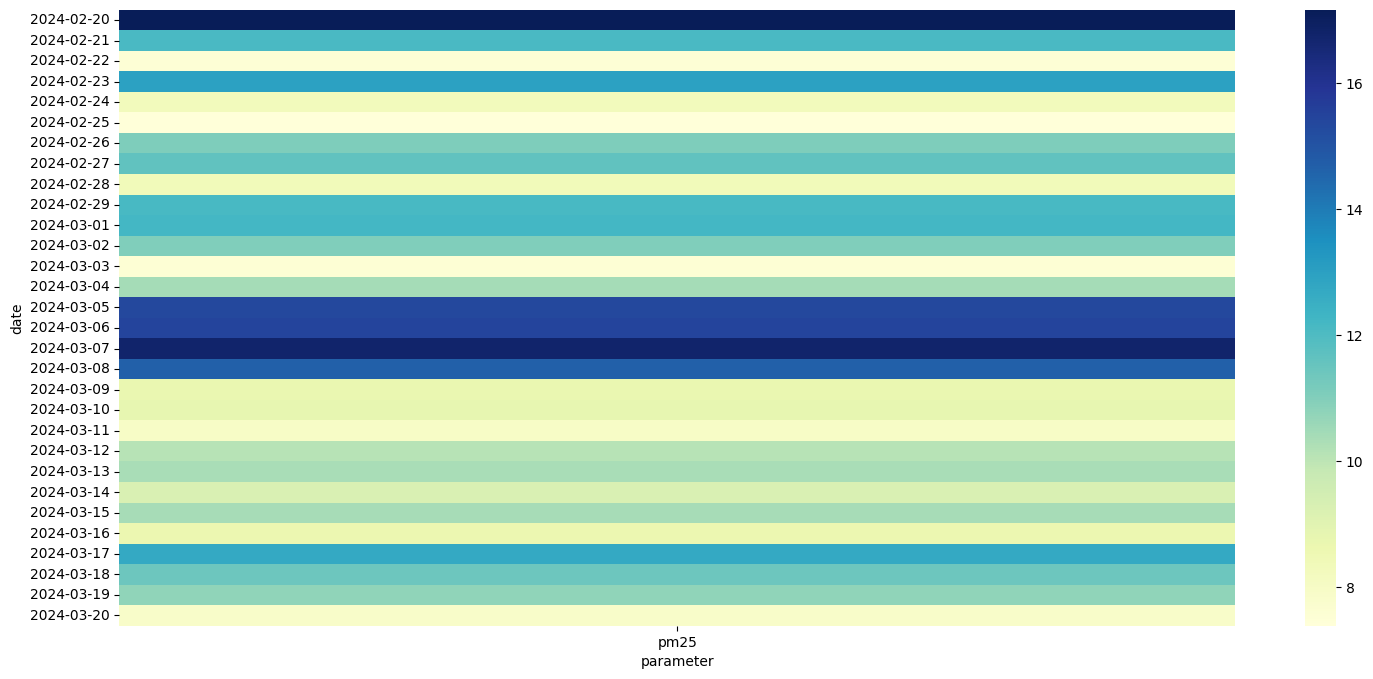

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_agg = df_pm25.groupby(['date', 'parameter'])['daily_avg_pm25'].mean().reset_index()

# Pivot the DataFrame to get the matrix format needed for the heatmap
pivot_df = df_agg.pivot(index='date',columns='parameter', values='daily_avg_pm25')

# Create the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(pivot_df, cmap='YlGnBu')

# Show the plot
plt.show()


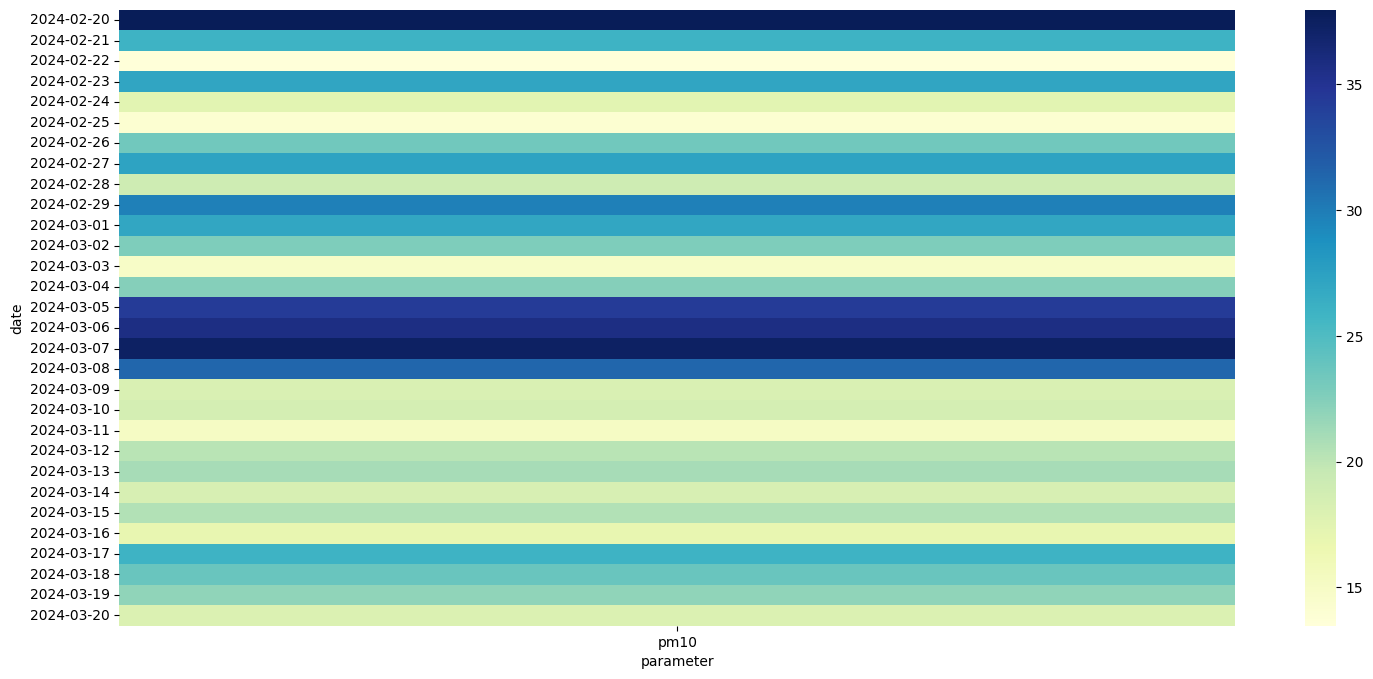

In [27]:
df_agg = df_pm10.groupby(['date', 'parameter'])['daily_avg_pm10'].mean().reset_index()

# Pivot the DataFrame to get the matrix format needed for the heatmap
pivot_df = df_agg.pivot(index='date',columns='parameter', values='daily_avg_pm10')

# Create the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(pivot_df, cmap='YlGnBu')

# Show the plot
plt.show()